In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sym
from numpy.polynomial import Chebyshev as T
import statsmodels.api as sm
from sympy import symbols, exp


In [ ]:
# load in data
db = pd.read_csv('all_data.csv')
pop = pd.read_csv('pop.csv')
db.head()

In [28]:
db.describe(include='all')

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [29]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [30]:
db.Country.value_counts()

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64

In [31]:
db.Year.value_counts()

Year
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: count, dtype: int64

In [32]:
pop.head()

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Chile,15351799,15523978,15693790,15859112,16017966,16175311,16334575,16495538,16661462,16833447,17004162,17173573,17341771,17509925,17687108,17870124
1,China,1262645000,1271850000,1280400000,1288400000,1296075000,1303720000,1311020000,1317885000,1324655000,1331260000,1337705000,1345035000,1354190000,1363240000,1371860000,1379860000
2,Germany,82211508,82349925,82488495,82534176,82516260,82469422,82376451,82266372,82110097,81902307,81776930,80274983,80425823,80645605,80982500,81686611
3,Mexico,97873442,99394288,100917081,102429341,103945813,105442402,106886790,108302973,109684489,111049428,112532401,114150481,115755909,117290686,118755887,120149897
4,United States of America,282162411,284968955,287625193,290107933,292805298,295516599,298379912,301231207,304093966,306771529,309327143,311583481,313877662,316059947,318386329,320738994


In [33]:
pop = pd.melt(pop, id_vars=['Country Name'], var_name='Year', value_name='Population')
pop = pop.rename(columns={"Country Name": "Country"})
pop["Year"] = pop["Year"].astype(np.int64)

In [34]:
pop.head

<bound method NDFrame.head of                       Country  Year  Population
0                       Chile  2000    15351799
1                       China  2000  1262645000
2                     Germany  2000    82211508
3                      Mexico  2000    97873442
4   United States of America   2000   282162411
..                        ...   ...         ...
91                      China  2015  1379860000
92                    Germany  2015    81686611
93                     Mexico  2015   120149897
94  United States of America   2015   320738994
95                   Zimbabwe  2015    14154937

[96 rows x 3 columns]>

In [35]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     96 non-null     object
 1   Year        96 non-null     int64 
 2   Population  96 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [36]:
db = db.merge(pop, left_on=['Country','Year'], right_on=['Country','Year'],how='inner')

In [37]:
db['GDP_per_Capita'] = db.GDP / db.Population

In [38]:
db.head

<bound method NDFrame.head of      Country  Year  Life expectancy at birth (years)           GDP  \
0      Chile  2000                              77.3  7.786093e+10   
1      Chile  2001                              77.3  7.097992e+10   
2      Chile  2002                              77.8  6.973681e+10   
3      Chile  2003                              77.9  7.564346e+10   
4      Chile  2004                              78.0  9.921039e+10   
..       ...   ...                               ...           ...   
75  Zimbabwe  2011                              54.9  1.209845e+10   
76  Zimbabwe  2012                              56.6  1.424249e+10   
77  Zimbabwe  2013                              58.0  1.545177e+10   
78  Zimbabwe  2014                              59.2  1.589105e+10   
79  Zimbabwe  2015                              60.7  1.630467e+10   

    Population  GDP_per_Capita  
0     15351799     5071.779024  
1     15523978     4572.276768  
2     15693790     4443.592748

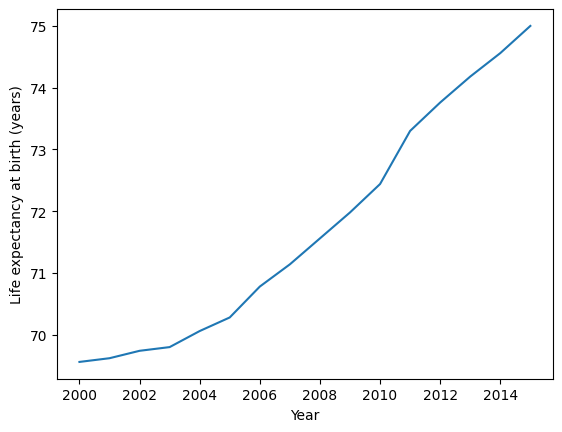

<Figure size 640x480 with 0 Axes>

In [95]:
#db.set_index("Year", inplace=True)

db = db.rename(columns={"Life expectancy at birth (years)": "Life_Expectancy"})

year_sum = db.groupby('Year', group_keys=False).Life_Expectancy.mean().reset_index()
gdp_sum = db.groupby('GDP_per_Capita', group_keys=False).Life_Expectancy.mean().reset_index()

# create line plot of sales data
plt.plot(year_sum["Year"], year_sum["Life_Expectancy"])
plt.xlabel("Year")
plt.ylabel("Life expectancy at birth (years)")
plt.show()
plt.clf()


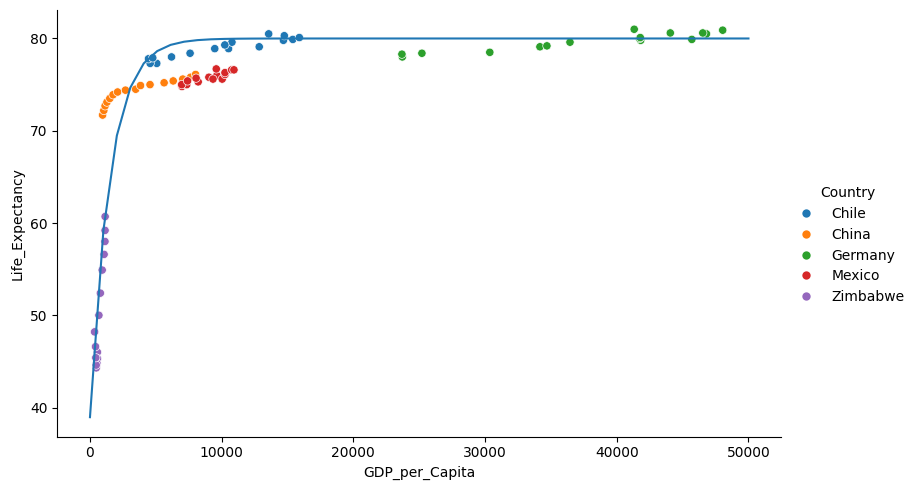

80 - 80*exp(-a/1500 - 2/3)


<Figure size 640x480 with 0 Axes>

In [98]:

countries = list(db['Country'].value_counts().index)

a = sym.symbols('a')

f = 80 * (1 - sym.exp(-(a+1000)/1500)) 
X = np.linspace(1, 50000) 
Y = sym.lambdify(a, f, "numpy")(X)

p1 = sns.relplot(data=db, x='GDP_per_Capita', y='Life_Expectancy', hue='Country', hue_order=countries, aspect=1.61,)
p2 = plt.plot(X, Y)

ax = p1.axes[0,0]


plt.show()
plt.clf()
print(f)